In [13]:
from IPython.display import HTML
# this cell hides all the code cells by default
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script><font size=4>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</font>''')

In [12]:
# remove warnings before sharing the nb
import warnings
warnings.filterwarnings('ignore')

As the title of the notebook indicates, the purpose of this document 
is to design a list of criteria that any ME measure we pick must 
fulfill.

A word on **notation**:  
- We write $m_i(t)$ for motion energy on trial $i$ at time $t$.  
- We write $\langle m(t)\rangle_i$ to mean the average across trials, at time $t$.  
- We write $\langle m_i\rangle_t$ to mean the time average, for trial $i$.  
- We write $M$ for the double expectation, along trial and time dimensions.  
- We add superscript $^j$ to label specific measure definitions.
- We write the sign function as $\rm sign$, and dismiss the fact that ${\rm sign}(0)=0$

Furthermore, we use the following variables for stimulus parameters:

In [2]:
from IPython.display import HTML, display
html_table = '<table style="width:40%"> <tr> <th><font size="4">Variable</font></th> <th><font size="4">Meaning</font></th> </tr> <tr> <td><font size="4">c</font></td> <td><font size="4">signed coherence in %</font></td></tr> <tr> <td><font size="4">n</font></td> <td><font size="4">number of dots per frame</font></td> </tr><tr> <td><font size="4">n_c(t;i)</font></td> <td><font size="4">number of coherent dots</font></td>   </tr></table>'
display(HTML(html_table))

Variable,Meaning
c,signed coherence in %
n,number of dots per frame
n_c(t;i),number of coherent dots


# List of criteria  a ME measure must meet
* Scalar quantity that evolves with time
* On average (across trials), the sign of the quantity matches the true direction of motion of the coherent dots, at any instant in time
* For fixed coherence (and other params), the fluctuations of the ME signal are "small"
* The behaviors illustrated in the plots below should hold

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

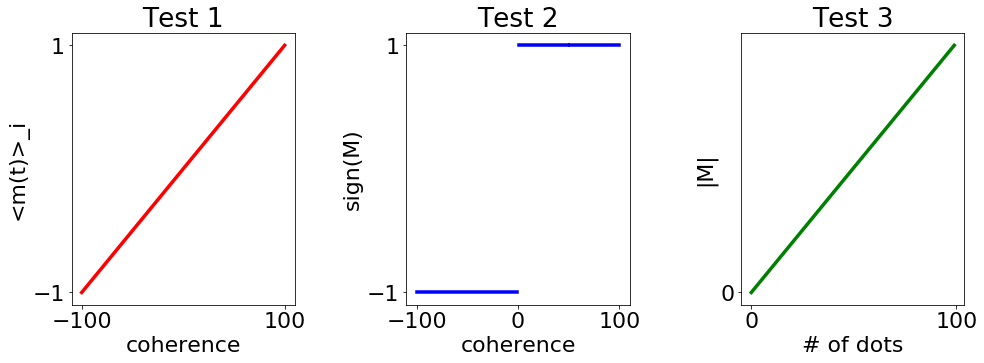

In [5]:
plt.rcParams["figure.figsize"] = (16, 5) # (w, h) # figure size 
plt.rcParams.update({'font.size': 22}) # font size on axes
plt.subplots_adjust(wspace=0.5) # horizontal space between panels
lw = 3.5

test_colors = {1:'red', 2:'blue', 3:'green'}

ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

# plot 1  --  Test 1
test_number = 1
c = np.arange(201) - 100
rescaled_c = c/100
ax1.plot(c,rescaled_c, linewidth=lw, color=test_colors[test_number])

# plot 2  --  Test 2
test_number = 2
signed_M = np.sign(rescaled_c)
# for ref on masks below, see
# https://stackoverflow.com/a/5940970
masked_coh = np.ma.masked_equal(c,50)
masked_signed_M = np.ma.masked_equal(signed_M,0)

ax2.plot(masked_coh, masked_signed_M, linewidth=lw, color=test_colors[test_number])

# plot 3  --  Test 3
test_number = 3
numDots = np.arange(100)
ax3.plot(numDots,numDots, linewidth=lw, color=test_colors[test_number])


# labels plot 1
ax1.set_title('Test 1')
ax1.set_xlabel('coherence')
ax1.set_ylabel('<m(t)>_i')
ax1.set_yticks([-1,1])
ax1.set_xticks([-100,100])

# labels plot 2
ax2.set_title('Test 2')
ax2.set_xlabel('coherence')
ax2.set_ylabel('sign(M)')
ax2.set_yticks([-1,1])

# labels plot 3
ax3.set_title('Test 3')
ax3.set_xlabel('# of dots')
ax3.set_ylabel('|M|')
ax3.set_yticks([0])
ax3.set_xticks([0,len(numDots)])

# Measure 1
$$M:=\frac{c}{100}\cdot n$$

This measure passes tests 2 and 3 above. But since it is a global measure that is independent of time and trial index, test 1 has no meaning for it.

# Measure 2
Another simple measure of ME is the number of coherent dots, for a given trial and time instant:

$$m_i(t):={\rm sign(c)}n_c(t;i)$$

Note that, assuming the total number of visible dots $n$ on each frame is the same,
our snow-dots algorithm draws $n_c(t;i)$ from a Binomial random variable with parameters 
$(n, |c| / 100)$.
Hence, for this measure, $M$ is the same as measure 1 above and automatically passes tests 2 & 3.

Test 1 is also passed, because $\langle m(t)\rangle_i = n|c|/100$, and therefore, the average (across trials) instantaneous strength of this measure is proportional to coherence. 
Note also that the sign of $m_i(t)$ is the same as that of $c$.

We might want a measure that can have a sign incompatible with the true coherent direction of motion, on any given trial, at any given time.

## Empirical measure of measure 2 

Our goal here is to use an actual dataset of dots to run test 1 on measure 2.

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)
library(data.table)

/home/adrian/anaconda3/envs/ME_particle/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: data.table 1.12.0  Latest news: r-datatable.com

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R 
dataFolder <- "/home/adrian/programing/data/motion_energy/"
dataTag <- "ME_DB_1"
datafile <- paste(dataFolder,dataTag,".csv",sep='')
data <- fread(file=datafile, header=TRUE, sep=",")
str(data)

Classes ‘data.table’ and 'data.frame':	24138 obs. of  22 variables:
 $ stencilNumber: int  1 1 1 1 1 1 1 1 1 1 ...
 $ pixelSize    : int  5 5 5 5 5 5 5 5 5 5 ...
 $ diameter     : int  10 10 10 10 10 10 10 10 10 10 ...
 $ speed        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ yCenter      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ xCenter      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ density      : int  80 80 80 80 80 80 80 80 80 80 ...
 $ direction    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ coherence    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ dotsDuration : int  200 200 200 200 200 200 200 200 200 200 ...
 $ randSeedBase : int  1 1 1 1 1 1 1 1 1 1 ...
 $ coherenceSTD : int  0 0 0 0 0 0 0 0 0 0 ...
 $ frameIdx     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ onsetTime    : num  2579 2579 2579 2579 2579 ...
 $ onsetFrame   : int  2 2 2 2 2 2 2 2 2 2 ...
 $ swapTime     : num  2579 2579 2579 2579 2579 ...
 $ isTight      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ iter         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dotIdx       : int  1 2 3 4 5 6 7

### Basic questions about the data
1. How many distinct parameter conditions are there in the dataset?
2. Get data to run test 1

In [5]:
%%R
source("R_functions.r")

# data without dots
dataNoDots <- data[,]

indepVarNames <- c("speed","direction","coherence")
combFactors <- getFreq(data, indepVarNames)
combFactors

   speed direction coherence freq.
1:     2         0         0  2970
2:     2         0        20  3024
3:     2         1         0  3024
4:     2         1        20  3024
5:     3         0         0  3024
6:     3         0        20  3024
7:     3         1         0  3024
8:     3         1        20  3024
